# Recommendations with IBM

In this notebook, you will be putting your recommendation skills to use on real data from the IBM Watson Studio platform. 


You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/rubrics/3325/view).  **Please save regularly.**

By following the table of contents, you will build out a number of different methods for making recommendations that can be used for different situations. 


## Table of Contents

I. [Exploratory Data Analysis](#Exploratory-Data-Analysis)<br>
II. [Rank Based Recommendations](#Rank)<br>
III. [User-User Based Collaborative Filtering](#User-User)<br>
IV. [Content Based Recommendations (EXTRA - NOT REQUIRED)](#Content-Recs)<br>
V. [Matrix Factorization](#Matrix-Fact)<br>
VI. [Extras & Concluding](#conclusions)


At the end of the notebook, you will find directions for how to submit your work.  Let's get started by importing the necessary libraries and reading in the data.

In [396]:
# Loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import project_tests as t
import pickle

%matplotlib inline

# Loading data
df = pd.read_csv('data/user-item-interactions.csv')
df_content = pd.read_csv('data/articles_community.csv')
del df['Unnamed: 0']
del df_content['Unnamed: 0']

# Showing df to get an idea of the data
df.head()


,article_id,title,email
0,1430.0,"using pixiedust for fast, flexible, and easier...",ef5f11f77ba020cd36e1105a00ab868bbdbf7fe7
1,1314.0,healthcare python streaming application demo,083cbdfa93c8444beaa4c5f5e0f5f9198e4f9e0b
2,1429.0,use deep learning for image classification,b96a4f2e92d8572034b1e9b28f9ac673765cd074
3,1338.0,ml optimization using cognitive assistant,06485706b34a5c9bf2a0ecdac41daf7e7654ceb7
4,1276.0,deploy your python model as a restful api,f01220c46fc92c6e6b161b1849de11faacd7ccb2


In [397]:
# Showing df_content to get an idea of the data
df_content.head()


,doc_body,doc_description,doc_full_name,doc_status,article_id
0,Skip navigation Sign in SearchLoading...\r\n\r...,Detect bad readings in real time using Python ...,Detect Malfunctioning IoT Sensors with Streami...,Live,0
1,No Free Hunch Navigation * kaggle.com\r\n\r\n ...,"See the forest, see the trees. Here lies the c...",Communicating data science: A guide to present...,Live,1
2,☰ * Login\r\n * Sign Up\r\n\r\n * Learning Pat...,Here’s this week’s news in Data Science and Bi...,"This Week in Data Science (April 18, 2017)",Live,2
3,"DATALAYER: HIGH THROUGHPUT, LOW LATENCY AT SCA...",Learn how distributed DBs solve the problem of...,DataLayer Conference: Boost the performance of...,Live,3
4,Skip navigation Sign in SearchLoading...\r\n\r...,This video demonstrates the power of IBM DataS...,Analyze NY Restaurant data using Spark in DSX,Live,4


### <a class="anchor" id="Exploratory-Data-Analysis">Part I : Exploratory Data Analysis</a>

Use the dictionary and cells below to provide some insight into the descriptive statistics of the data.

`1.` What is the distribution of how many articles a user interacts with in the dataset?  Provide a visual and descriptive statistics to assist with giving a look at the number of times each user interacts with an article.  

#### Exploring data frame "df"

In [398]:
# Checking the shape of the data frame
df.shape


(45993, 3)

In [399]:
# Checking the dtype of the dataframe
df.dtypes


article_id    float64
title          object
email          object
dtype: object

In [400]:
# Checking the number of missing values
df.isnull().sum()


article_id     0
title          0
email         17
dtype: int64

In [401]:
# Checking number of unique values for each column
print('Number of unique values of column "{}":'.format(df.columns[2]), df['email'].nunique())
print('Number of unique values of column "{}":'.format(df.columns[1]), df['title'].nunique())


Number of unique values of column "email": 5148
Number of unique values of column "title": 714


In [402]:
# Defining user interactions
user_interact = df.groupby('email').count()['article_id']
user_interact


email
0000b6387a0366322d7fbfc6434af145adf7fed1    13
001055fc0bb67f71e8fa17002342b256a30254cd     4
00148e4911c7e04eeff8def7bbbdaf1c59c2c621     3
001a852ecbd6cc12ab77a785efa137b2646505fe     6
001fc95b90da5c3cb12c501d201a915e4f093290     2
0042719415c4fca7d30bd2d4e9d17c5fc570de13     2
00772abe2d0b269b2336fc27f0f4d7cb1d2b65d7     3
008ba1d5b4ebf54babf516a2d5aa43e184865da5    10
008ca24b82c41d513b3799d09ae276d37f92ce72     1
008dfc7a327b5186244caec48e0ab61610a0c660    13
009af4e0537378bf8e8caf0ad0e2994f954d822e     1
00bda305223d05f6df5d77de41abd2a0c7d895fe     4
00c2d5190e8c6b821b0e3848bf56f6e47e428994     3
00ced21f957bbcee5edf7b107b2bd05628b04774     4
00d9337ecd5f70fba1c4c7a78e21b3532e0112c4     3
00e524e4f13137a6fac54f9c71d7769c6507ecde    11
00f8341cbecd6af00ba8c78b3bb6ec49adf83248     3
00f946b14100f0605fa25089437ee9486378872c     1
01041260c97ab9221d923b0a2c525437f148d589     2
0108ce3220657a9a89a85bdec959b0f2976dd51c     4
011455e91a24c1fb815a4deac6b6eaf5ad16819e     9
01198c5

In [403]:
# Calculating the median of users
user_med = user_interact.median()


In [477]:
# Function: Defining function for the plot layout
def plot_1():
    '''
    INPUT:
    none
    
    OUTPUT:
    figsize - (plot size) A definition of the plot dimensions
    
    '''

    plt.figure(figsize=(9,6))
    

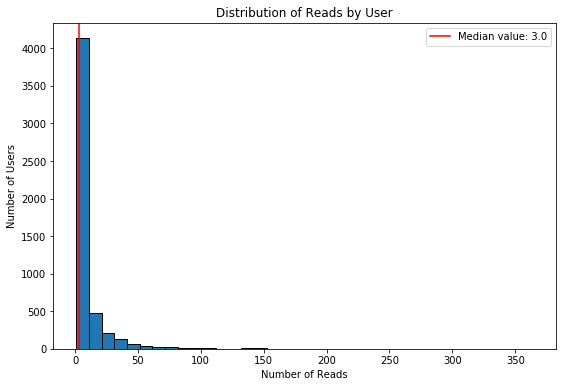

In [478]:
# Visualisation: Plotting the distribution
plot_1() # Function: Defining function for the plot layout 
plt.hist(user_interact, bins=36, edgecolor='k')
plt.title("Distribution of Reads by User")
plt.ylabel('Number of Users');
plt.xlabel('Number of Reads');
plt.axvline(user_med, color='r', label ="Median value: {}".format(user_med))
plt.legend(loc='best');


In [406]:
# Calculating the descriptive statistics of the user interaction
# (50 % is equal to the median)
user_interact.describe()


count    5148.000000
mean        8.930847
std        16.802267
min         1.000000
25%         1.000000
50%         3.000000
75%         9.000000
max       364.000000
Name: article_id, dtype: float64

In [407]:
# Filling in the median and maximum number of user_article interactios below

# 50% of individuals interact with ____ number of articles or fewer.
median_val = user_med
print('1. Median: 50% of individuals interact with {} number of articles or fewer.'.format(user_med))

# The maximum number of user-article interactions by any 1 user is ______.
max_views_by_user = np.max(user_interact)
print('2. Maximum: The maximum number of user-article interactions by any 1 user is {}.'.format(max_views_by_user))


1. Median: 50% of individuals interact with 3.0 number of articles or fewer.
2. Maximum: The maximum number of user-article interactions by any 1 user is 364.


`2.` Explore and remove duplicate articles from the **df_content** dataframe.  

#### Exploring data frame "df_content"

In [408]:
# Checking the shape of the data frame
df_content.shape


(1056, 5)

In [409]:
# Checking the dtype of the dataframe
df_content.dtypes


doc_body           object
doc_description    object
doc_full_name      object
doc_status         object
article_id          int64
dtype: object

In [410]:
# Finding and exploring duplicate articles
df_content[df_content.duplicated(subset='article_id', keep=False)]


,doc_body,doc_description,doc_full_name,doc_status,article_id
50,Follow Sign in / Sign up Home About Insight Da...,Community Detection at Scale,Graph-based machine learning,Live,50
221,* United States\r\n\r\nIBM® * Site map\r\n\r\n...,When used to make sense of huge amounts of con...,How smart catalogs can turn the big data flood...,Live,221
232,Homepage Follow Sign in Get started Homepage *...,"If you are like most data scientists, you are ...",Self-service data preparation with IBM Data Re...,Live,232
365,Follow Sign in / Sign up Home About Insight Da...,During the seven-week Insight Data Engineering...,Graph-based machine learning,Live,50
399,Homepage Follow Sign in Get started * Home\r\n...,Today’s world of data science leverages data f...,Using Apache Spark as a parallel processing fr...,Live,398
578,This video shows you how to construct queries ...,This video shows you how to construct queries ...,Use the Primary Index,Live,577
692,Homepage Follow Sign in / Sign up Homepage * H...,One of the earliest documented catalogs was co...,How smart catalogs can turn the big data flood...,Live,221
761,Homepage Follow Sign in Get started Homepage *...,Today’s world of data science leverages data f...,Using Apache Spark as a parallel processing fr...,Live,398
970,This video shows you how to construct queries ...,This video shows you how to construct queries ...,Use the Primary Index,Live,577
971,Homepage Follow Sign in Get started * Home\r\n...,"If you are like most data scientists, you are ...",Self-service data preparation with IBM Data Re...,Live,232


In [411]:
# Counting duplicate articles
df_content[df_content["article_id"].duplicated()].count()


doc_body           5
doc_description    5
doc_full_name      5
doc_status         5
article_id         5
dtype: int64

In [412]:
# Removing any rows that have the same article_id - only keep the first
df_content.drop_duplicates(subset='article_id', inplace=True, keep='first')


In [413]:
# Counting duplicate articles
df_content[df_content["article_id"].duplicated()].count()


doc_body           0
doc_description    0
doc_full_name      0
doc_status         0
article_id         0
dtype: int64

`3.` Use the cells below to find:

**a.** The number of unique articles that have an interaction with a user.  
**b.** The number of unique articles in the dataset (whether they have any interactions or not).<br>
**c.** The number of unique users in the dataset. (excluding null values) <br>
**d.** The number of user-article interactions in the dataset.

In [414]:
# Showing the unique values of the data frame
df.nunique()


article_id     714
title          714
email         5148
dtype: int64

In [415]:
# a. The number of unique articles that have at least one interaction
unique_articles = df['title'].nunique()
print('a. Number of unique articles with user interaction: {}'.format(unique_articles))

# b. The number of unique articles on the IBM platform
total_articles = df_content["article_id"].shape[0]
print('b. Number of unique articles in the dataset: {}'.format(total_articles))

# c. The number of unique users
unique_users = df["email"].nunique()
print('c. Number of unique users in the dataset: {}'.format(unique_users))

# d. The number of user-article interactions
user_article_interactions = df.shape[0]
print('d. Number of unique user-article interaction in the dataset: {}'.format(user_article_interactions))


a. Number of unique articles with user interaction: 714
b. Number of unique articles in the dataset: 1051
c. Number of unique users in the dataset: 5148
d. Number of unique user-article interaction in the dataset: 45993


`4.` Use the cells below to find the most viewed **article_id**, as well as how often it was viewed.  After talking to the company leaders, the `email_mapper` function was deemed a reasonable way to map users to ids.  There were a small number of null values, and it was found that all of these null values likely belonged to a single user (which is how they are stored using the function below).

In [416]:
# Listing the most viewed "article_id" counts descented sorted by "email"
df.groupby(by='article_id').count().sort_values(by='email', ascending=False).iloc[:1]


,title,email
article_id,,
1429.0,937,937


In [417]:
# The most viewed article in the dataset as a string with one value following the decimal
most_viewed_article_id = df['article_id'].value_counts().index[0]
most_viewed_article_id = most_viewed_article_id.astype(str)
print('Most viewed article in the dataset: {}'.format(most_viewed_article_id))

# The most viewed article in the dataset was viewed how many times?
max_id = most_viewed_article_id.strip('.0')
max_id = pd.to_numeric(max_id)
max_views = df['article_id'].value_counts()[max_id]
print('Maximum number of most viewed article in the dataset: {}'.format(max_views))


Most viewed article in the dataset: 1429.0
Maximum number of most viewed article in the dataset: 937


In [418]:
## No need to change the code here - this will be helpful for later parts of the notebook
# Run this cell to map the user email to a user_id column and remove the email column

def email_mapper():
    coded_dict = dict()
    cter = 1
    email_encoded = []
    
    for val in df['email']:
        if val not in coded_dict:
            coded_dict[val] = cter
            cter+=1
        
        email_encoded.append(coded_dict[val])
    return email_encoded

email_encoded = email_mapper()
del df['email']
df['user_id'] = email_encoded

# show header
df.head()


,article_id,title,user_id
0,1430.0,"using pixiedust for fast, flexible, and easier...",1
1,1314.0,healthcare python streaming application demo,2
2,1429.0,use deep learning for image classification,3
3,1338.0,ml optimization using cognitive assistant,4
4,1276.0,deploy your python model as a restful api,5


In [419]:
## If you stored all your results in the variable names above, 
## you shouldn't need to change anything in this cell

sol_1_dict = {
    '`50% of individuals have _____ or fewer interactions.`': median_val,
    '`The total number of user-article interactions in the dataset is ______.`': user_article_interactions,
    '`The maximum number of user-article interactions by any 1 user is ______.`': max_views_by_user,
    '`The most viewed article in the dataset was viewed _____ times.`': max_views,
    '`The article_id of the most viewed article is ______.`': most_viewed_article_id,
    '`The number of unique articles that have at least 1 rating ______.`': unique_articles,
    '`The number of unique users in the dataset is ______`': unique_users,
    '`The number of unique articles on the IBM platform`': total_articles
}

# Test your dictionary against the solution
t.sol_1_test(sol_1_dict)

It looks like you have everything right here! Nice job!


### <a class="anchor" id="Rank">Part II: Rank-Based Recommendations</a>

Unlike in the earlier lessons, we don't actually have ratings for whether a user liked an article or not.  We only know that a user has interacted with an article.  In these cases, the popularity of an article can really only be based on how often an article was interacted with.

`1.` Fill in the function below to return the **n** top articles ordered with most interactions as the top. Test your function using the tests below.

In [420]:
# Defining a new column to count the interactions
df['ranking'] = df['article_id'].map(df['article_id'].value_counts())


In [421]:
# Sorting values based on the new column
df_n_top = df.sort_values(by='ranking', ascending=False)
df_n_top.head(3)


,article_id,title,user_id,ranking
15728,1429.0,use deep learning for image classification,72,937
20263,1429.0,use deep learning for image classification,296,937
40328,1429.0,use deep learning for image classification,4516,937


In [422]:
# Counting duplicates
df_n_top[df_n_top["article_id"].duplicated()].count()


article_id    45279
title         45279
user_id       45279
ranking       45279
dtype: int64

In [423]:
# Dropping the duplicate "article_id"
df_n_top = df_n_top.drop_duplicates(subset='article_id')
df_n_top.head(3)


,article_id,title,user_id,ranking
15728,1429.0,use deep learning for image classification,72,937
41229,1330.0,insights from new york car accident reports,4637,927
6078,1431.0,visualize car data with brunel,1427,671


In [424]:
# Counting duplicates
df_n_top[df_n_top["article_id"].duplicated()].count()


article_id    0
title         0
user_id       0
ranking       0
dtype: int64

In [425]:
# Creating a list of n-top interactions 
n = 6 # Defining variable value
df_n_top.iloc[:n, :]['title'].tolist()


['use deep learning for image classification',
 'insights from new york car accident reports',
 'visualize car data with brunel',
 'use xgboost, scikit-learn & ibm watson machine learning apis',
 'predicting churn with the spss random tree algorithm',
 'healthcare python streaming application demo']

In [426]:
# Function: Defining function to get the top articles
def get_top_articles(n, df=df):
    '''
    INPUT:
    n - (int) the number of top articles to return
    df - (pandas dataframe) df as defined at the top of the notebook 
    
    OUTPUT:
    top_articles - (list) A list of the top 'n' article titles 
    
    '''
    # Your code here
    #
    
    # Defining a new column to count the interactions
    df['ranking'] = df['article_id'].map(df['article_id'].value_counts())

    # Sorting values based on the new column
    df_n_top = df.sort_values(by='ranking', ascending=False)
    
    # Dropping the duplicate "article_id"
    df_n_top = df_n_top.drop_duplicates(subset='article_id')

    # Creating a list of n-top interactions 
    top_articles = df_n_top.iloc[:n, :]['title'].tolist()
    
    return top_articles # Return the top article titles from df (not df_content)


# Function: Defining function to get the top articles id´s
def get_top_article_ids(n, df=df):
    '''
    INPUT:
    n - (int) the number of top articles to return
    df - (pandas dataframe) df as defined at the top of the notebook 
    
    OUTPUT:
    top_article_ids - (list) A list of the top 'n' article id´s 
    
    '''
    # Your code here
    #
    
    # Defining a new column to count the interactions
    df['ranking'] = df['article_id'].map(df['article_id'].value_counts())

    # Sorting values based on the new column
    df_n_top = df.sort_values(by='ranking', ascending=False)
    
    # Dropping the duplicate "article_id"
    df_n_top = df_n_top.drop_duplicates(subset='article_id')

    # Creating a list of n-top interactions 
    top_article_ids = df_n_top.iloc[:n, :]['article_id'].tolist()
 
    return top_article_ids # Return the top article ids


In [427]:
# Printing the top 10 articles and article ids
print(get_top_articles(10))
print(get_top_article_ids(10))


['use deep learning for image classification', 'insights from new york car accident reports', 'visualize car data with brunel', 'use xgboost, scikit-learn & ibm watson machine learning apis', 'predicting churn with the spss random tree algorithm', 'healthcare python streaming application demo', 'finding optimal locations of new store using decision optimization', 'apache spark lab, part 1: basic concepts', 'analyze energy consumption in buildings', 'gosales transactions for logistic regression model']
[1429.0, 1330.0, 1431.0, 1427.0, 1364.0, 1314.0, 1293.0, 1170.0, 1162.0, 1304.0]


In [428]:
# Test your function by returning the top 5, 10, and 20 articles
top_5 = get_top_articles(5)
top_10 = get_top_articles(10)
top_20 = get_top_articles(20)

# Test each of your three lists from above
t.sol_2_test(get_top_articles)

Your top_5 looks like the solution list! Nice job.
Your top_10 looks like the solution list! Nice job.
Your top_20 looks like the solution list! Nice job.


### <a class="anchor" id="User-User">Part III: User-User Based Collaborative Filtering</a>


`1.` Use the function below to reformat the **df** dataframe to be shaped with users as the rows and articles as the columns.  

* Each **user** should only appear in each **row** once.


* Each **article** should only show up in one **column**.  


* **If a user has interacted with an article, then place a 1 where the user-row meets for that article-column**.  It does not matter how many times a user has interacted with the article, all entries where a user has interacted with an article should be a 1.  


* **If a user has not interacted with an item, then place a zero where the user-row meets for that article-column**. 

Use the tests to make sure the basic structure of your matrix matches what is expected by the solution.

In [429]:
# Reformatting rows and columns of the dataframe (unstack function)
df_reform = df.groupby(by=['user_id', 'article_id'])["title"].count().unstack()
df_reform.head(3)


article_id,0.0,2.0,4.0,8.0,9.0,12.0,14.0,15.0,16.0,18.0,...,1434.0,1435.0,1436.0,1437.0,1439.0,1440.0,1441.0,1442.0,1443.0,1444.0
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [430]:
# Filling NaN with "0" (not NaN values: keeping value "1")
user_item = df_reform.notnull().astype(int)
user_item.head(3)


article_id,0.0,2.0,4.0,8.0,9.0,12.0,14.0,15.0,16.0,18.0,...,1434.0,1435.0,1436.0,1437.0,1439.0,1440.0,1441.0,1442.0,1443.0,1444.0
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [431]:
# Function: Creating the user-article matrix with 1's and 0's
def create_user_item_matrix(df):
    '''
    INPUT:
    df - pandas dataframe with article_id, title, user_id columns
    
    OUTPUT:
    user_item - user item matrix 
    
    Description:
    Return a matrix with user ids as rows and article ids on the columns with 1 values where a user interacted with 
    an article and a 0 otherwise
    '''
    # Fill in the function here
    #
    
    # Reformatting rows and columns of the dataframe
    df_reform = df.groupby(by=['user_id', 'article_id'])["title"].count().unstack()
 
    # Filling NaN with "0" and not NaN with "1" interger values
    user_item = df_reform.notnull().astype(int)

    return user_item # return the user_item matrix 

user_item = create_user_item_matrix(df)


In [432]:
## Tests: You should just need to run this cell.  Don't change the code.
assert user_item.shape[0] == 5149, "Oops!  The number of users in the user-article matrix doesn't look right."
assert user_item.shape[1] == 714, "Oops!  The number of articles in the user-article matrix doesn't look right."
assert user_item.sum(axis=1)[1] == 36, "Oops!  The number of articles seen by user 1 doesn't look right."
print("You have passed our quick tests!  Please proceed!")

You have passed our quick tests!  Please proceed!


`2.` Complete the function below which should take a user_id and provide an ordered list of the most similar users to that user (from most similar to least similar).  The returned result should not contain the provided user_id, as we know that each user is similar to him/herself. Because the results for each user here are binary, it (perhaps) makes sense to compute similarity as the dot product of two users. 

Use the tests to test your function.

In [433]:
# Creating a pandas dataframe
df_user_item = pd.DataFrame(user_item)
df_user_item.head(3)


article_id,0.0,2.0,4.0,8.0,9.0,12.0,14.0,15.0,16.0,18.0,...,1434.0,1435.0,1436.0,1437.0,1439.0,1440.0,1441.0,1442.0,1443.0,1444.0
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [434]:
# Computing similarity of each user to the provided user
user_id = 63 # Defining variable value
sim = df_user_item.dot(user_item.loc[user_id])
sim.head(3)


user_id
1    5
2    1
3    3
dtype: int64

In [435]:
# Sorting by similarity
sim = sim.sort_values(ascending=False)
sim.head(3)


user_id
63      16
4502    15
203      9
dtype: int64

In [436]:
# Creating list of the user ids
sim = sim.index.tolist()


In [437]:
# Removing the own user id
most_similar_users = [id for id in sim if id != user_id]


In [438]:
# Function: Defining function to get the similar users
def find_similar_users(user_id, user_item=user_item):
    '''
    INPUT:
    user_id - (int) a user_id
    user_item - (pandas dataframe) matrix of users by articles: 
                1's when a user has interacted with an article, 0 otherwise
    
    OUTPUT:
    most_similar_users - (list) an ordered list where the closest users (largest dot product users)
                    are listed first
    
    Description:
    Computes the similarity of every pair of users based on the dot product
    Returns an ordered
    
    '''
    # Creating a pandas dataframe
    df_user_item = pd.DataFrame(user_item)
    
    # Computing similarity of each user to the provided user
    sim = df_user_item.dot(user_item.loc[user_id])
        
    # Sorting by similarity
    sim = sim.sort_values(ascending=False)    
 
    # Creating list of the user ids
    sim = sim.index.tolist()
   
    # Removing the own user id
    most_similar_users = [id for id in sim if id != user_id]
       
    return most_similar_users # return a list of the users in order from most to least similar
        

In [439]:
# Do a spot check of your function
print("The 10 most similar users to user 1 are: {}".format(find_similar_users(1)[:10]))
print("The 5 most similar users to user 3933 are: {}".format(find_similar_users(3933)[:5]))
print("The 3 most similar users to user 46 are: {}".format(find_similar_users(46)[:3]))

The 10 most similar users to user 1 are: [3933, 23, 3782, 203, 4459, 131, 3870, 46, 4201, 5041]
The 5 most similar users to user 3933 are: [1, 23, 3782, 4459, 203]
The 3 most similar users to user 46 are: [4201, 23, 3782]


`3.` Now that you have a function that provides the most similar users to each user, you will want to use these users to find articles you can recommend.  Complete the functions below to return the articles you would recommend to each user. 

In [440]:
# Creating list for article ids as pandas dataframe
article_ids = 63 # Defining variable value
article_ids = pd.Series(article_ids).astype(np.float).astype(np.int32).tolist()


In [441]:
# Creating the list of article names
article_names = df[df["article_id"].isin(article_ids)]["title"].unique().tolist()
article_names


[]

In [442]:
# Defining user ids 
user_id = 63 # Defining variable value
user_ids = user_item.loc[[user_id]]
user_ids


article_id,0.0,2.0,4.0,8.0,9.0,12.0,14.0,15.0,16.0,18.0,...,1434.0,1435.0,1436.0,1437.0,1439.0,1440.0,1441.0,1442.0,1443.0,1444.0
user_id,,,,,,,,,,,,,,,,,,,,,
63,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [443]:
# Creating the list of article ids 
article_ids = user_ids[user_ids==1].dropna(axis=1).columns.tolist()
article_ids = [str(i) for i in article_ids]
article_ids


['268.0',
 '486.0',
 '678.0',
 '684.0',
 '695.0',
 '881.0',
 '930.0',
 '993.0',
 '1059.0',
 '1276.0',
 '1293.0',
 '1360.0',
 '1393.0',
 '1400.0',
 '1427.0',
 '1430.0']

In [444]:
# Defining similar users
user_id = 63 # Defining variable value
sim_users = find_similar_users(user_id)
print(sim_users)


[4502, 203, 4459, 3870, 131, 3764, 98, 3784, 3782, 40, 23, 371, 763, 3540, 49, 4932, 3697, 912, 347, 52, 46, 195, 3933, 1355, 4933, 2790, 322, 3578, 3596, 3621, 3622, 135, 4511, 214, 1, 4134, 4778, 2982, 21, 4201, 290, 3195, 4785, 273, 3141, 249, 11, 126, 185, 418, 176, 4356, 3966, 3483, 113, 3518, 456, 1035, 598, 1240, 3986, 155, 1137, 4991, 13, 4934, 187, 3172, 4876, 4883, 2903, 4088, 674, 122, 3654, 2941, 129, 251, 252, 3057, 4515, 3100, 4518, 3197, 121, 510, 288, 4999, 3061, 536, 3740, 2258, 220, 262, 111, 511, 3691, 4706, 114, 3237, 4786, 215, 3007, 3404, 3618, 3439, 170, 4755, 2813, 3169, 420, 2975, 4642, 4904, 4901, 2826, 3147, 186, 395, 3763, 3474, 3353, 241, 242, 330, 169, 3486, 245, 197, 1405, 3190, 3532, 1244, 204, 3316, 151, 4685, 484, 132, 4268, 37, 4204, 2430, 4300, 609, 4082, 58, 5041, 829, 922, 17, 4287, 754, 3968, 698, 765, 5069, 688, 3910, 71, 4390, 4145, 807, 619, 5058, 3960, 5059, 3951, 82, 1026, 94, 542, 4071, 51, 56, 896, 6, 4, 3783, 3794, 3, 5143, 558, 3812, 86, 

In [445]:
# Creating a list of recommendations for the user
recs = df[df["user_id"].isin(sim_users)]["article_id"]
recs = list(set(recs))
print(recs)


[0.0, 2.0, 4.0, 8.0, 9.0, 12.0, 14.0, 15.0, 16.0, 18.0, 20.0, 25.0, 26.0, 28.0, 29.0, 30.0, 32.0, 33.0, 34.0, 36.0, 39.0, 40.0, 43.0, 48.0, 50.0, 51.0, 53.0, 54.0, 57.0, 58.0, 59.0, 60.0, 62.0, 64.0, 65.0, 68.0, 74.0, 76.0, 77.0, 78.0, 80.0, 81.0, 82.0, 87.0, 89.0, 92.0, 96.0, 98.0, 100.0, 101.0, 102.0, 103.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 115.0, 116.0, 117.0, 120.0, 122.0, 124.0, 125.0, 130.0, 131.0, 132.0, 134.0, 136.0, 138.0, 142.0, 143.0, 145.0, 146.0, 151.0, 152.0, 153.0, 157.0, 158.0, 162.0, 164.0, 173.0, 176.0, 181.0, 183.0, 184.0, 188.0, 189.0, 191.0, 193.0, 194.0, 195.0, 202.0, 205.0, 210.0, 213.0, 215.0, 221.0, 223.0, 224.0, 225.0, 230.0, 232.0, 233.0, 234.0, 236.0, 237.0, 239.0, 240.0, 241.0, 244.0, 250.0, 251.0, 252.0, 253.0, 254.0, 256.0, 258.0, 260.0, 263.0, 266.0, 268.0, 270.0, 273.0, 277.0, 278.0, 283.0, 284.0, 288.0, 291.0, 295.0, 297.0, 298.0, 299.0, 302.0, 303.0, 310.0, 311.0, 313.0, 314.0, 315.0, 316.0, 319.0, 323.0, 324.0, 329.0, 330.0, 336.0, 33

In [446]:
# Function: Defining function to get the article names
def get_article_names(article_ids, df=df):
    '''
    INPUT:
    article_ids - (list) a list of article ids
    df - (pandas dataframe) df as defined at the top of the notebook
    
    OUTPUT:
    article_names - (list) a list of article names associated with the list of article ids 
                    (this is identified by the title column)
    '''
    # Your code here
    #
    
    # Creating list for article ids as pandas dataframe
    article_ids = pd.Series(article_ids).astype(np.float).astype(np.int32).tolist()
    
    # Creating the list of article names
    article_names = df[df["article_id"].isin(article_ids)]["title"].unique().tolist()
  
    return article_names # Return the article names associated with list of article ids


# Function: Defining function to get the article ids and article names
def get_user_articles(user_id, user_item=user_item):
    '''
    INPUT:
    user_id - (int) a user id
    user_item - (pandas dataframe) matrix of users by articles: 
                1's when a user has interacted with an article, 0 otherwise
    
    OUTPUT:
    article_ids - (list) a list of the article ids seen by the user
    article_names - (list) a list of article names associated with the list of article ids 
                    (this is identified by the doc_full_name column in df_content)
    
    Description:
    Provides a list of the article_ids and article titles that have been seen by a user
    '''
    # Your code here
    #
     
    # Defining user ids 
    user_ids = user_item.loc[[user_id]]
    
    # Creating the list of article ids 
    article_ids = user_ids[user_ids==1].dropna(axis=1).columns.tolist()
    article_ids = [str(i) for i in article_ids]

    # Creating the list of article names
    article_names = get_article_names(article_ids)

    return article_ids, article_names # return the ids and names


# Function: Defining function to get the user-user recommendations
def user_user_recs(user_id, m=10):
    '''
    INPUT:
    user_id - (int) a user id
    m - (int) the number of recommendations you want for the user
    
    OUTPUT:
    recs - (list) a list of recommendations for the user
    
    Description:
    Loops through the users based on closeness to the input user_id
    For each user - finds articles the user hasn't seen before and provides them as recs
    Does this until m recommendations are found
    
    Notes:
    Users who are the same closeness are chosen arbitrarily as the 'next' user
    
    For the user where the number of recommended articles starts below m 
    and ends exceeding m, the last items are chosen arbitrarily
    
    '''
    # Your code here
    #
    
    # Defining similar users
    sim_users = find_similar_users(user_id)
    
    # Creating a list of recommendations for the user
    recs = df[df["user_id"].isin(sim_users)]["article_id"]
    recs = list(set(recs))
    
    return recs # return your recommendations for this user_id   


In [447]:
# Checking results
get_article_names(user_user_recs(1, 10)) # Return 10 recommendations for user 1


['using pixiedust for fast, flexible, and easier data analysis and experimentation',
 'healthcare python streaming application demo',
 'use deep learning for image classification',
 'ml optimization using cognitive assistant',
 'deploy your python model as a restful api',
 'visualize data with the matplotlib library',
 'upload files to ibm data science experience using the command line',
 'classify tumors with machine learning',
 'configuring the apache spark sql context',
 'got zip code data? prep it for analytics. – ibm watson data lab – medium',
 'the unit commitment problem',
 'apache spark lab, part 1: basic concepts',
 'getting started with python',
 'timeseries data analysis of iot events by using jupyter notebook',
 '10 must attend data science, ml and ai conferences in 2018',
 'housing (2015): united states demographic measures',
 'access db2 warehouse on cloud and db2 with python',
 'the nurse assignment problem',
 'dsx: hybrid mode',
 'predicting churn with the spss random t

In [448]:
# Testing your functions here - No need to change this code - just run this cell
assert set(get_article_names(['1024.0', '1176.0', '1305.0', '1314.0', '1422.0', '1427.0'])) == set(['using deep learning to reconstruct high-resolution audio', 'build a python app on the streaming analytics service', 'gosales transactions for naive bayes model', 'healthcare python streaming application demo', 'use r dataframes & ibm watson natural language understanding', 'use xgboost, scikit-learn & ibm watson machine learning apis']), "Oops! Your the get_article_names function doesn't work quite how we expect."
assert set(get_article_names(['1320.0', '232.0', '844.0'])) == set(['housing (2015): united states demographic measures','self-service data preparation with ibm data refinery','use the cloudant-spark connector in python notebook']), "Oops! Your the get_article_names function doesn't work quite how we expect."
assert set(get_user_articles(20)[0]) == set(['1320.0', '232.0', '844.0'])
assert set(get_user_articles(20)[1]) == set(['housing (2015): united states demographic measures', 'self-service data preparation with ibm data refinery','use the cloudant-spark connector in python notebook'])
assert set(get_user_articles(2)[0]) == set(['1024.0', '1176.0', '1305.0', '1314.0', '1422.0', '1427.0'])
assert set(get_user_articles(2)[1]) == set(['using deep learning to reconstruct high-resolution audio', 'build a python app on the streaming analytics service', 'gosales transactions for naive bayes model', 'healthcare python streaming application demo', 'use r dataframes & ibm watson natural language understanding', 'use xgboost, scikit-learn & ibm watson machine learning apis'])
print("If this is all you see, you passed all of our tests!  Nice job!")


If this is all you see, you passed all of our tests!  Nice job!


`4.` Now we are going to improve the consistency of the **user_user_recs** function from above.  

* Instead of arbitrarily choosing when we obtain users who are all the same closeness to a given user - choose the users that have the most total article interactions before choosing those with fewer article interactions.


* Instead of arbitrarily choosing articles from the user where the number of recommended articles starts below m and ends exceeding m, choose articles with the articles with the most total interactions before choosing those with fewer total interactions. This ranking should be  what would be obtained from the **top_articles** function you wrote earlier.

In [449]:
# Defining array of user interatcions
user_id = 96 # Defining variable value
interact_arr = np.array(user_item.loc[user_id])
interact_arr


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0,

In [450]:
# Creating a matrix of user interactions
interact_mat = user_item.drop(user_id)
interact_mat.head(3)


article_id,0.0,2.0,4.0,8.0,9.0,12.0,14.0,15.0,16.0,18.0,...,1434.0,1435.0,1436.0,1437.0,1439.0,1440.0,1441.0,1442.0,1443.0,1444.0
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [451]:
# Computing the similarity
sim = np.dot(interact_mat.values, interact_arr)
sim


array([0, 0, 1, ..., 0, 0, 0])

In [452]:
# Creating a pandas dataframe
df_sim = pd.DataFrame({'nbr_id': interact_mat.index,'sim': sim.flatten()})
df_sim.head(3)


,nbr_id,sim
0,1,0
1,2,0
2,3,1


In [453]:
# Counting the interactions
interact_count = df.groupby('user_id')['article_id'].count()
interact_count.head(3)


user_id
1    47
2     6
3    82
Name: article_id, dtype: int64

In [454]:
# Creating a pandas dataframe
df_interact = pd.DataFrame({'nbr_id': interact_count.index,'n_interact': interact_count.values})
df_interact.head(3)


,nbr_id,n_interact
0,1,47
1,2,6
2,3,82


In [455]:
# Defining the neighbors dataframe by merging the defined dataframes above
neighbors_df = df_sim.merge(df_interact)
neighbors_df.head(3)


,nbr_id,sim,n_interact
0,1,0,47
1,2,0,6
2,3,1,82


In [456]:
# Sorting descending by similarity
neighbors_df.sort_values(by=['sim', 'n_interact'],inplace=True, ascending=False)
neighbors_df.head(3)


,nbr_id,sim,n_interact
22,23,3,364
3780,3782,3,363
48,49,3,147


In [457]:
# Function: Defining function to get the top sorted users
def get_top_sorted_users(user_id, df=df, user_item=user_item):
    '''
    INPUT:
    user_id - (int)
    df - (pandas dataframe) df as defined at the top of the notebook 
    user_item - (pandas dataframe) matrix of users by articles: 
            1's when a user has interacted with an article, 0 otherwise
    
            
    OUTPUT:
    neighbors_df - (pandas dataframe) a dataframe with:
                    neighbor_id - is a neighbor user_id
                    similarity - measure of the similarity of each user to the provided user_id
                    num_interactions - the number of articles viewed by the user - if a u
                    
    Other Details - sort the neighbors_df by the similarity and then by number of interactions where 
                    highest of each is higher in the dataframe
     
    '''
    # Your code here
    #
   
    # Defining array of user interatcions
    interact_arr = np.array(user_item.loc[user_id])

    # Creating a matrix of user interactions
    interact_mat = user_item.drop(user_id)
    
    # Computing the similarity
    sim = np.dot(interact_mat.values, interact_arr)

    # Creating a pandas dataframe
    df_sim = pd.DataFrame({'nbr_id': interact_mat.index,'sim': sim.flatten()})

    # Counting the interactions
    interact_count = df.groupby('user_id')['article_id'].count()
    
    # Creating a pandas dataframe
    df_interact = pd.DataFrame({'nbr_id': interact_count.index,'n_interact': interact_count.values})

    # Defining the neighbors dataframe by merging the defined dataframes above
    neighbors_df = df_sim.merge(df_interact)

    # Sorting by similarity and interactions
    neighbors_df.sort_values(by=['sim', 'n_interact'],inplace=True, ascending=False)
    
    return neighbors_df # Return the dataframe specified in the doc_string


# Function: Defining function to get the user-user recommendations
def user_user_recs_part2(user_id, m=10):
    '''
    INPUT:
    user_id - (int) a user id
    m - (int) the number of recommendations you want for the user
    
    OUTPUT:
    recs - (list) a list of recommendations for the user by article id
    rec_names - (list) a list of recommendations for the user by article title
    
    Description:
    Loops through the users based on closeness to the input user_id
    For each user - finds articles the user hasn't seen before and provides them as recs
    Does this until m recommendations are found
    
    Notes:
    * Choose the users that have the most total article interactions 
    before choosing those with fewer article interactions.

    * Choose articles with the articles with the most total interactions 
    before choosing those with fewer total interactions. 
   
    '''
    # Your code here
    #
    
    # Creating a pandas dataframe
    df_nbrs = get_top_sorted_users(user_id)

    # Defining the neighbours id
    nbrs_id = df_nbrs['nbr_id'].values

    # Creating list with "article_id" records
    recs = []

    for id in nbrs_id:
        article_ids = user_item.loc[id]
        recs.append([str(article_ids.index[i]) for i in range(len(article_ids)) if int(article_ids.values[i])])

    recs = list(set(recs[m]))
    
    # Defining list with article name records
    rec_names = list(set(df[df["article_id"].isin(recs)]["title"]))
        
    return recs, rec_names


In [458]:
user_id = 96 # Defining variable value
m = 10 # Defining variable value

# Defining dataframe of neighbours
df_nbrs = get_top_sorted_users(user_id)
df_nbrs.head(3)


,nbr_id,sim,n_interact
22,23,3,364
3780,3782,3,363
48,49,3,147


In [459]:
# Defining the neighbours id
nbrs_id = df_nbrs['nbr_id'].values
nbrs_id


array([  23, 3782,   49, ..., 5147, 5148, 5149])

In [460]:
# Creating list with "article_id" records
recs = []

for id in nbrs_id:
    article_ids = user_item.loc[id]
    recs.append([str(article_ids.index[i]) for i in range(len(article_ids)) if int(article_ids.values[i])])

recs = list(set(recs[m]))
recs


['1162.0',
 '53.0',
 '1437.0',
 '444.0',
 '943.0',
 '1148.0',
 '1014.0',
 '14.0',
 '1393.0',
 '298.0',
 '1364.0',
 '1429.0',
 '1035.0',
 '658.0',
 '221.0',
 '1398.0',
 '470.0',
 '1360.0',
 '64.0',
 '1368.0',
 '1296.0',
 '1089.0',
 '812.0',
 '510.0',
 '415.0',
 '1436.0',
 '1170.0']

In [461]:
# Defining list with article name records
rec_names = list(set(df[df["article_id"].isin(recs)]["title"]))
print(rec_names)


['predicting churn with the spss random tree algorithm', 'got zip code data? prep it for analytics. – ibm watson data lab – medium', 'this week in data science (may 30, 2017)', '1448    i ranked every intro to data science course on...\nName: title, dtype: object', 'predicting gentrification using longitudinal census data', 'how smart catalogs can turn the big data flood into an ocean of opportunity', 'putting a human face on machine learning', 'introducing streams designer', 'welcome to pixiedust', 'pixieapp for outlier detection', 'what’s new in the streaming analytics service on bluemix', 'declarative machine learning', 'fortune 100 companies', 'the nurse assignment problem', 'apache spark lab, part 1: basic concepts', 'machine learning exercises in python, part 1', 'use deep learning for image classification', 'using machine learning to predict value of homes on airbnb', 'total population by country', 'automating web analytics through python', 'analyze energy consumption in buildin

In [462]:
# Quick spot check - don't change this code - just use it to test your functions
rec_ids, rec_names = user_user_recs_part2(20, 10)
print("The top 10 recommendations for user 20 are the following article ids:")
print(rec_ids)
print()
print("The top 10 recommendations for user 20 are the following article names:")
print(rec_names)

The top 10 recommendations for user 20 are the following article ids:
['793.0', '981.0', '1271.0', '1296.0', '53.0', '232.0', '495.0', '1320.0', '1053.0', '89.0', '1186.0', '727.0']

The top 10 recommendations for user 20 are the following article names:
['fortune 100 companies', 'self-service data preparation with ibm data refinery', 'connect to db2 warehouse on cloud and db2 using scala', '10 powerful features on watson data platform, no coding necessary', 'access mysql with python', 'top 20 r machine learning and data science packages', 'from python nested lists to multidimensional numpy arrays', 'super fast string matching in python', 'introducing streams designer', 'housing (2015): united states demographic measures', 'top 10 machine learning algorithms for beginners', 'customer demographics and sales']


`5.` Use your functions from above to correctly fill in the solutions to the dictionary below.  Then test your dictionary against the solution.  Provide the code you need to answer each following the comments below.

In [463]:
### Tests with a dictionary of results

# Finding the user that is most similar to user 1 
user1_most_sim = get_top_sorted_users(1)['nbr_id'].values[0]
print(user1_most_sim)

# Finding the 10th most similar user to user 131
user131_10th_sim = get_top_sorted_users(131)['nbr_id'].values[9]
print(user131_10th_sim)


3933
242


In [464]:
## Dictionary Test Here
sol_5_dict = {
    'The user that is most similar to user 1.': user1_most_sim, 
    'The user that is the 10th most similar to user 131': user131_10th_sim,
}

t.sol_5_test(sol_5_dict)


This all looks good!  Nice job!


`6.` If we were given a new user, which of the above functions would you be able to use to make recommendations?  Explain.  Can you think of a better way we might make recommendations?  Use the cell below to explain a better method for new users.

**Provide your response here.**

**Response:**

Since there is no data of a new user available, there is no exact possibility to recommend an article to this new user based on historic data.
One possibility could be, to recommend articles based on the function `get_top_article_ids`. Because this function is based on historic data available from users. And the new user might like it, too.
Necessary for good recommendations is to collect more data about a ne user.

`7.` Using your existing functions, provide the top 10 recommended articles you would provide for the a new user below.  You can test your function against our thoughts to make sure we are all on the same page with how we might make a recommendation.

In [465]:
new_user = '0.0'

# What would your recommendations be for this new user '0.0'?  As a new user, they have no observed articles.
# Provide a list of the top 10 article ids you would give to 
# Your recommendations here

# Getting top article ids
articles = get_top_article_ids(10)

# Defining reccomendations for new user
new_user_recs = [str(i) for i in articles] 


In [466]:
assert set(new_user_recs) == set(['1314.0','1429.0','1293.0','1427.0','1162.0','1364.0','1304.0','1170.0','1431.0','1330.0']), "Oops!  It makes sense that in this case we would want to recommend the most popular articles, because we don't know anything about these users."

print("That's right!  Nice job!")


That's right!  Nice job!


### <a class="anchor" id="Content-Recs">Part IV: Content Based Recommendations (EXTRA - NOT REQUIRED)</a>

Another method we might use to make recommendations is to perform a ranking of the highest ranked articles associated with some term.  You might consider content to be the **doc_body**, **doc_description**, or **doc_full_name**.  There isn't one way to create a content based recommendation, especially considering that each of these columns hold content related information.  

`1.` Use the function body below to create a content based recommender.  Since there isn't one right answer for this recommendation tactic, no test functions are provided.  Feel free to change the function inputs if you decide you want to try a method that requires more input values.  The input values are currently set with one idea in mind that you may use to make content based recommendations.  One additional idea is that you might want to choose the most popular recommendations that meet your 'content criteria', but again, there is a lot of flexibility in how you might make these recommendations.

### This part is NOT REQUIRED to pass this project.  However, you may choose to take this on as an extra way to show off your skills.

In [467]:
def make_content_recs():
    '''
    INPUT:
    
    OUTPUT:
    
    '''

`2.` Now that you have put together your content-based recommendation system, use the cell below to write a summary explaining how your content based recommender works.  Do you see any possible improvements that could be made to your function?  Is there anything novel about your content based recommender?

### This part is NOT REQUIRED to pass this project.  However, you may choose to take this on as an extra way to show off your skills.

**Write an explanation of your content based recommendation system here.**

`3.` Use your content-recommendation system to make recommendations for the below scenarios based on the comments.  Again no tests are provided here, because there isn't one right answer that could be used to find these content based recommendations.

### This part is NOT REQUIRED to pass this project.  However, you may choose to take this on as an extra way to show off your skills.

In [468]:
# make recommendations for a brand new user


# make a recommendations for a user who only has interacted with article id '1427.0'



### <a class="anchor" id="Matrix-Fact">Part V: Matrix Factorization</a>

In this part of the notebook, you will build use matrix factorization to make article recommendations to the users on the IBM Watson Studio platform.

`1.` You should have already created a **user_item** matrix above in **question 1** of **Part III** above.  This first question here will just require that you run the cells to get things set up for the rest of **Part V** of the notebook. 

In [470]:
# Loading the matrix here
user_item_matrix = pd.read_pickle('user_item_matrix.p')


In [471]:
# Quick look at the matrix
user_item_matrix.head()


article_id,0.0,100.0,1000.0,1004.0,1006.0,1008.0,101.0,1014.0,1015.0,1016.0,...,977.0,98.0,981.0,984.0,985.0,986.0,990.0,993.0,996.0,997.0
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


`2.` In this situation, you can use Singular Value Decomposition from [numpy](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.linalg.svd.html) on the user-item matrix.  Use the cell to perform SVD, and explain why this is different than in the lesson.

In [472]:
# Performing SVD on the User-Item Matrix Here
# Creating the u, s, vt matrices
u, s, vt = np.linalg.svd(user_item_matrix)
 

In [475]:
# Printing the result of U, Sigma, and V-transpose matrices
print('SVD Matrix of "u": {}'.format(u.shape))
print('SVD Matrix of "s": {}'.format(s.shape))
print('SVD Matrix of "vt": {}'.format(vt.shape))

SVD Matrix of "u": (5149, 5149)
SVD Matrix of "s": (714,)
SVD Matrix of "vt": (714, 714)


**Provide your response here.**

**Response:**

> SVD needs a dataset without NaN values to fully perform. In this case the creating of the three matrices was possible. The meaning of that is, the data does not contain any missing values.
In case of missing values SVD would not run and show an error message.

`3.` Now for the tricky part, how do we choose the number of latent features to use?  Running the below cell, you can see that as the number of latent features increases, we obtain a lower error rate on making predictions for the 1 and 0 values in the user-item matrix.  Run the cell below to get an idea of how the accuracy improves as we increase the number of latent features.

In [485]:
# Function: Defining function for the plot layout
def plot_2():
    '''
    INPUT:
    none
    
    OUTPUT:
    figsize - (plot size) A definition of the plot dimensions
    title - Name of visualization
    xlabel - Name of X axis
    ylabel - Name of Y axis
    
    '''

    plt.figure(figsize=(9,6))
    plt.title('Accuracy vs. Number of Latent Features');
    plt.xlabel('Number of Latent Features');
    plt.ylabel('Accuracy');
    

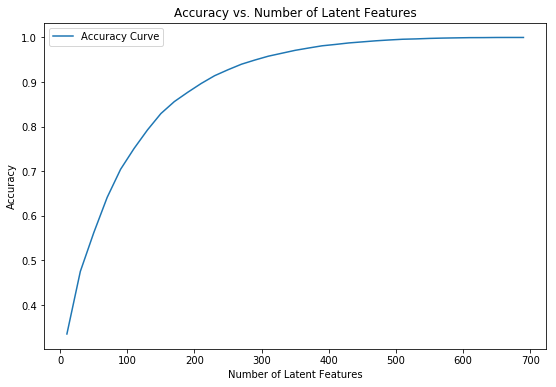

In [486]:
# Visualization: Visualization of accuracy over the number of latent features (Actual)
num_latent_feats = np.arange(10,700+10,20)
sum_errs = []

for k in num_latent_feats:
    # Restructuring with k latent features
    s_new, u_new, vt_new = np.diag(s[:k]), u[:, :k], vt[:k, :]
    
    # Taking dot product
    user_item_est = np.around(np.dot(np.dot(u_new, s_new), vt_new))
    
    # Computing error for each prediction to actual value
    diffs = np.subtract(user_item_matrix, user_item_est)
    
    # Total errors and keeping track of them
    err = np.sum(np.sum(np.abs(diffs)))
    sum_errs.append(err)
    

plot_2() # Function: Defining function for the plot layout 
plt.plot(num_latent_feats, 1 - np.array(sum_errs)/df.shape[0], label='Accuracy Curve');
plt.legend(loc='best');


`4.` From the above, we can't really be sure how many features to use, because simply having a better way to predict the 1's and 0's of the matrix doesn't exactly give us an indication of if we are able to make good recommendations.  Instead, we might split our dataset into a training and test set of data, as shown in the cell below.  

Use the code from question 3 to understand the impact on accuracy of the training and test sets of data with different numbers of latent features. Using the split below: 

* How many users can we make predictions for in the test set?  
* How many users are we not able to make predictions for because of the cold start problem?
* How many articles can we make predictions for in the test set?  
* How many articles are we not able to make predictions for because of the cold start problem?

In [487]:
df_train = df.head(40000)
df_test = df.tail(5993)

# Function: Defining function for the train and test split
def create_test_and_train_user_item(df_train, df_test):
    '''
    INPUT:
    df_train - training dataframe
    df_test - test dataframe
    
    OUTPUT:
    user_item_train - a user-item matrix of the training dataframe 
                      (unique users for each row and unique articles for each column)
    user_item_test - a user-item matrix of the testing dataframe 
                    (unique users for each row and unique articles for each column)
    test_idx - all of the test user ids
    test_arts - all of the test article ids
    
    '''
    # Your code here
    #
    
    # Defining matrix of the training dataframe
    user_item_train = create_user_item_matrix(df_train)
    
    # Defining matrix of the testing dataframe
    user_item_test = create_user_item_matrix(df_test)
    
    # Defining list of test user ids
    test_idx = user_item_test.index.tolist()
    
    # Defining list of test article ids
    test_arts = user_item_test.columns.tolist()
    
    return user_item_train, user_item_test, test_idx, test_arts

user_item_train, user_item_test, test_idx, test_arts = create_test_and_train_user_item(df_train, df_test)


In [488]:
# Overviewing the matrix of the testing dataframe
user_item_test.shape


(682, 574)

In [489]:
# Calculating the answer to Question 1
q1 = user_item_train.index.isin(test_idx).sum()
print('Test set: Number of users we can make predictions for: {}'.format(q1))


Test set: Number of users we can make predictions for: 20


In [490]:
# Calculating the answer to Question 2
q2 = user_item_test.shape[0] - q1
print('Cold start problem: Number of users we are not able to make predictions for: {}'.format(q2))


Cold start problem: Number of users we are not able to make predictions for: 662


In [491]:
# Calculating the answer to Question 3
#q3 = user_item_test.shape[1]
q3 = user_item_train.columns.isin(test_arts).sum()
print('Test set: Number of articles we can make predictions for: {}'.format(q3))


Test set: Number of articles we can make predictions for: 574


In [492]:
# Calculating the answer to Question 4
q4 = user_item_test.shape[1] - q3
print('Cold start problem: Number of articles we are not able to make predictions for: {}'.format(q4))


Cold start problem: Number of articles we are not able to make predictions for: 0


In [493]:
# Replace the values in the dictionary below
a = 662
b = 574
c = 20
d = 0


sol_4_dict = {
    'How many users can we make predictions for in the test set?': c,
    'How many users in the test set are we not able to make predictions for because of the cold start problem?': a,
    # See also Important Info below! (articles --> movies)
    #'How many articles can we make predictions for in the test set?': b,
    'How many movies can we make predictions for in the test set?': b,
    # See also Important Info below! (articles --> movies)
    #'How many articles in the test set are we not able to make predictions for because of the cold start problem?': d
    'How many movies in the test set are we not able to make predictions for because of the cold start problem?': d
}

t.sol_4_test(sol_4_dict)

Awesome job!  That's right!  All of the test movies are in the training data, but there are only 20 test users that were also in the training set.  All of the other users that are in the test set we have no data on.  Therefore, we cannot make predictions for these users using SVD.


**Important Info**

> It seems to be a problem with the test file (code). Because I a m getting the error code "How many movies can we make predictions for in the test set?". Since we are considering "articles" and not "movies" in this project, I tried to find a solution in the knowledge section.
I solved the problem by changing "How many articles ..." into "How many movies ..." due to the post:

>> https://knowledge.udacity.com/questions/770708

`5.` Now use the **user_item_train** dataset from above to find U, S, and V transpose using SVD. Then find the subset of rows in the **user_item_test** dataset that you can predict using this matrix decomposition with different numbers of latent features to see how many features makes sense to keep based on the accuracy on the test data. This will require combining what was done in questions `2` - `4`.

Use the cells below to explore how well SVD works towards making predictions for recommendations on the test data.  

In [494]:
# Use these cells to see how well you can use the training 
# decomposition to predict on test data

In [495]:
# Fitting SVD on the user_item_train matrix
# Fitting SVD similar to above then use the cells below 
# Creating the u_train, s_train, vt_train matrices
u_train, s_train, vt_train = np.linalg.svd(user_item_train)


In [497]:
# Printing the result of U, Sigma, and V-transpose matrices
print('Predict: SVD Matrix of "u": {}'.format(u_train.shape))
print('Predict: SVD Matrix of "s": {}'.format(s_train.shape))
print('Predict: SVD Matrix of "vt": {}'.format(vt_train.shape))

SVD Matrix of "u": (4487, 4487)
SVD Matrix of "s": (714,)
SVD Matrix of "vt": (714, 714)


In [505]:
#  Test set: u_test (rows)
u_test = u_train[user_item_train.index.isin(user_item_test.index)]
print(u_test)

#  Test set: vt_test (columns)
vt_test = vt_train[:, user_item_train.columns.isin(user_item_test.columns)]
print(vt_test)


[[ -9.12128414e-03  -1.04593665e-02  -3.44661555e-05 ...,  -1.79527638e-04
    1.57363124e-04  -2.22606585e-03]
 [ -4.23484921e-02  -8.80195536e-02   2.37441056e-02 ...,  -9.64599546e-04
    1.09471046e-03  -4.16064153e-03]
 [ -1.08548005e-02  -4.07260013e-02  -6.40519993e-03 ...,   2.48133636e-03
    2.85137940e-03   4.37297957e-03]
 ..., 
 [ -2.00584196e-02   4.52035654e-03   1.40205893e-03 ...,  -1.99000075e-03
   -2.18702165e-03  -6.78878413e-03]
 [ -4.34321936e-02   4.29457303e-02   3.35667405e-02 ...,  -3.96677563e-03
    1.23123106e-02  -1.34565016e-02]
 [ -1.61097454e-02  -6.66008794e-03   7.28103953e-03 ...,  -2.79762572e-04
   -1.37741965e-04   4.87579480e-01]]
[[ -2.17234322e-03  -2.50211538e-02  -2.47568584e-03 ...,  -1.19178349e-03
   -1.75764013e-03  -4.04943583e-03]
 [  2.07052261e-03  -2.21578691e-02   1.47527709e-03 ...,   2.10270582e-03
    8.19235025e-03   1.53390757e-02]
 [ -1.12698320e-03  -1.75169207e-03  -4.36025174e-03 ...,  -5.90100152e-03
   -5.73042987e-03  -

In [506]:
# Defining list of users of the train and test data sets
users_train_test = user_item_train.index[user_item_train.index.isin(test_idx)].tolist()

# Loading the new matrix
user_item_matrix = user_item_test.loc[users_train_test]
user_item_matrix.shape

(20, 574)

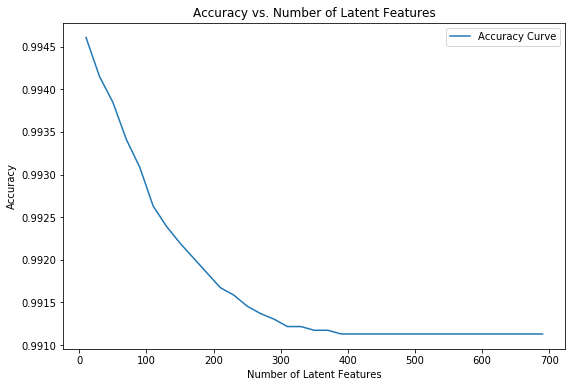

In [507]:
# Visualization: Visualization of accuracy over the number of latent features (Predict)
num_latent_feats = np.arange(10,700+10,20)
sum_errs = []

for k in num_latent_feats:
    # Restructuring with k latent features
    s_train_new, u_train_new, vt_train_new = np.diag(s_train[:k]), u_train[:, :k], vt_train[:k, :]
    u_test_new, vt_test_new = u_test[:, :k], vt_test[:k, :]

    # Taking dot product
    user_item_est_train = np.around(np.dot(np.dot(u_train_new, s_train_new), vt_train_new))
    user_item_est_test = np.around(np.dot(np.dot(u_test_new, s_train_new), vt_test_new)) 
    
    # Computing error for each prediction to predict value
    diffs = np.subtract(user_item_matrix, user_item_est_test)
    
    # Total errors and keeping track of them
    err = np.sum(np.sum(np.abs(diffs)))
    sum_errs.append(err)
    
plot_2() # Function: Defining function for the plot layout  
plt.plot(num_latent_feats, 1 - np.array(sum_errs)/df.shape[0], label='Accuracy Curve');
plt.legend(loc='best');


`6.` Use the cell below to comment on the results you found in the previous question. Given the circumstances of your results, discuss what you might do to determine if the recommendations you make with any of the above recommendation systems are an improvement to how users currently find articles? 

**Your response here.**

**Response:**

> With increasing numbers of latent features (k) the accuracy decreases. This could be due to an overfitting problem.
It is also noticeable that the delta of the accuracy by increasing number of latent features is not that much. Which means tht even with a high number of latent features (e.g. 600) the accuracy is still around a value of "0.99...".

<a id='conclusions'></a>
### Extras
Using your workbook, you could now save your recommendations for each user, develop a class to make new predictions and update your results, and make a flask app to deploy your results.  These tasks are beyond what is required for this project.  However, from what you learned in the lessons, you certainly capable of taking these tasks on to improve upon your work here!


## Conclusion

> Congratulations!  You have reached the end of the Recommendations with IBM project! 

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the [rubric](https://review.udacity.com/#!/rubrics/2322/view). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations! 

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Recommendations_with_IBM.ipynb'])